In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
np.random.binomial(30, 0.7)

22

* what the above line of code is doing
    * We conduct an experiment where we record the number of successful events given only two possible events (ie heads vs tails) and having a set probability in which a successful event occures. 
    * If the experiment outlined above is conducted many times, a binomial distribution can be produced in which the x-axis represents the total number of successful events and the y-axis represents the probability of that number of events occuring.  
    * Thus, the above line of code outputs the total number of succesful events occuring for a point from the binomial distribution produced when the number of trials is 30 and the probability of success is 0.7. The binomial distribution is illustrated below.

<img src="https://en.wikipedia.org/wiki/Binomial_distribution#/media/File:Binomial_distribution_pmf.svg">


### Bayesian Parameter Estimation

* The generative model for one person and one website example can be described with the following illustration

  * Suppose that a user is equally likely to signup or forgo signing up
 

![](media/chapter1/ab_user.jpg)


* Say we are selecting 8 individuals to try one version A, what does the generative process look like?

In [19]:
# @hidden_cell
#@title
#this will be hidden

from IPython.display import HTML, display
from ipywidgets import widgets, Output
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

p=0.5

button = widgets.Button(description = "Run the experiment!")
display(button)
out=Output()
display(out)

green_link='images/green.jpg'
red_link='images/red.jpg'
black_link='images/black.jpg'
arrow_link='images/arrow.jpg'
green_guy="<td><img src="+green_link+"></td>"
red_guy="<td><img src="+red_link+"></td>"
black_guy="<td><img src="+black_link+"></td>"
arrow="<td><img src="+arrow_link+"></td>"



def on_button_clicked(b):
    number_guys = 0
    test=st.bernoulli.rvs(p, size=1)
    guys=""
    for item in test:
      if item==1:
        guys=guys+green_guy
      else:
        guys=guys+red_guy
      number_guys+=item
    
    out.clear_output()
    with out:
        display(HTML("<table><tr><td>"+black_guy+"</td><td>"+arrow+"</td><td>"+guys+"</td></tr></table>"))


button.on_click(on_button_clicked)

Button(description='Run the experiment!', style=ButtonStyle())

Output()

In [18]:
# @hidden_cell
#@title
#this will be hidden
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from ipywidgets import widgets, Output
from IPython.display import HTML, display

button = widgets.Button(description = "Run the experiment!")
display(button)
out=Output()
display(out)

dist_values=[0]*9

green_link='images/green.jpg'
red_link='images/red.jpg'
green_guy="<td><img src="+green_link+"></td>"
red_guy="<td><img src="+red_link+"></td>"

def on_button_clicked(b):
    p=0.5
    test=st.bernoulli.rvs(p, size=8)
    guys=""
    number_guys = 0
    for item in test:
      if item==1:
        guys=guys+green_guy
      else:
        guys=guys+red_guy
      number_guys+=item
    out.clear_output()
    dist_values[number_guys]+=1
    fig = plt.figure(figsize=(14,5))
    plt.style.use('seaborn-darkgrid')
    x = np.arange(0, 9)
    ns = [8]
    ps = [p]
    for n, p in zip(ns, ps):
        plt.bar(x, dist_values)
    plt.bar(x[number_guys],dist_values[number_guys],color='green')
    plt.xlabel('number of sign ups', fontsize=14)
    plt.ylabel('counts', fontsize=14)
    plt.xticks(range(0,9))
    with out:
        display(HTML("<table><tr>"+guys+"</tr></table>"))
        plt.show()
#plt.yticks([]);
#plt.legend(loc=1)


button.on_click(on_button_clicked)

Button(description='Run the experiment!', style=ButtonStyle())

Output()

### The Long Run Distribution

* If one repeats the experiment many times, the graph will represent the binomial distribution

  *  The distribution is parameterized by $n=8$ and "p=0.5"

  *  What is being generated here is what is being selected from in the first example with the code `np.random.binomial(30, 0.7).` 
  
  *  Every time the button is clicked, `test=st.bernoulli.rvs(p, size=8)` creates an array of 8 elements where each element is the outcome of a Bernoulli distribution. In this case each Bernoulli distribution was whether or not a user signed up, with the probability of a user signing up being 0.5. Thus 8 outcomes were independently generated to model the behavior of 8 pretend users. If each result is added to the previous results eventually a binomial distribution will be produced.  
      
<img src="images/longrun.png">


### Observations

* We don't know version `A` and `B` signup rates $p_1$ and $p_2$ a priori 


  
* Clearly, we can use the maximum likelihood (ml) to estimate the parmeters

* However: 
  * The sample is small and random events can greatly skew estimation
  * ml given a 95% confidence that may be large
  * Confidence interval tells us where the interval may be with 95% confidence
    * What we are often interested in is the probability of individual values

  * There is no way to encode our belief about the param
    * We know param should be ~0.9 because other reserach showed that
    * How can we incorporate that in esimating the param? 

* Our approach need to take that into consideration


In [9]:
# Suppose outcomes are 
outcomes = [True] * 5 + [False] * 3
outcomes

[True, True, True, True, True, False, False, False]

In [8]:
bootstrap = np.random.choice(outcomes, size=8, replace=True)
bootstrap_proportion = sum(bootstrap)/len(bootstrap)
bootstrap_proportion

0.75

* what `np.random.choice` is doing is producing a new random sample from an initial sample (the outcomes array). By setting the size equal to 8, 8 samples are randomly chosen from the outcomes array. Additionally, because replace is true, some samples may be chosen more than once and other samples may not be chosen at all. A fourth parameter p also exists, in which, each value in the initial sample (the outcomes array) can be assigned a certain probablity. If the fourth parameter is not set, it is assumed that each value in the initial sample has an equal probability of being chosen or more formally a uniform random distribution exists over all values in the initial sample.

* the full `np.random.choice` function is:
    * `numpy.random.choice(a, size=None, replace=True, p=None)`

* in this example, since boolean values are used in which true is 1 and false is 0, the entire array can be summed up to give the total number of true values present in the new random sample. By dividing this by the total number of values in the new random sample (which is the length of the new random sample array), the proportion of true values randomly sampled can be obtained. 





In [24]:
bootstrap_proportions = []
for _ in range(10000):
    bootstrap = np.random.choice(outcomes, size=8, replace=True)
    bootstrap_proportion = sum(bootstrap)/len(bootstrap)
    bootstrap_proportions.append(bootstrap_proportion)   
np.percentile(bootstrap_proportions, (2.5, 97.5))


array([0.25 , 0.875])

* at the 2.5 percentile, the bootstrap proportion is 0.25. In other words, this means that if we had 1000 bootstrap proportion values, then the lowest 25 values will all have a bootstrap proportion no greater than 0.25. Similarly at the 97.5 percentile, the bootstrap proportion is 0.875. Which would mean that if we had 1000 bootstrap proportion values, then the lowest 975 values would have a bootstrap proportion no greater than 0.875. 

* In the `for _ in range(10000)` section, the underscore is just there to indicate that the counter variable is being "thrown away", since it is not being used. it could just have easily been written as: `for i in range(10000)`

* The `np.percentile` computes percentiles of the array given as the first argument for percentiles specified in the second argument.`bootstrap_proportions` is the array and `(2.5, 97.5)` is the two percentiles it calculates values for. 

### Running the simulation Backwards

* Rather than generate random outcomes of the experiment, we record random parameters that could have yielded the observed results

* Which params could have generated 5 signups in 8 trials?
    * Recall that $p$ is continuous probability between 0 and 1


* given that p is continuous between 0 and 1, recording random parameters that could have yielded observed results would result in a probability density function. Since there are no discrete probability values, the distribution would show the "density" around discrete points. 

https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.choice.html
https://docs.scipy.org/doc/numpy/reference/generated/numpy.percentile.html
https://www.burns-stat.com/documents/tutorials/the-statistical-bootstrap-and-other-resampling-methods-2/#bootstrap
http://www.learningaboutelectronics.com/Articles/How-to-get-percentiles-in-Python-with-numpy.php
https://www.tutorialspoint.com/python/python_bernoulli_distribution.htm
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html
    

### Bayesian Inference Using Rejection Sampling 

The scenarios that we have observed so far, for **Bayesian inference** have only required expectation values for some normal distribution. For such tasks, we can perform implicit posterior inference using Monte Carlo methods. These randomly generated values simulate samples from the target distribution, which can then be used for estimating expectations. However, we turn to rejection sampling (another simple monte carlo method), to sample paramaters from some distributions and sort through them by deciding whether to accept or reject them based on a criteria. 


Using **rejection sampling** we can answer questions such as:


*  What is the most likely value of parameter $p_1$ for our previous experiment (A)?

*  What is the most likely the probability of hitting the center of a dart board?







### Rejection Sampling 


To understand the motivation behind **rejection sampling**, imagine graphing the density function of a random variable onto a large rectangular dart board. Let this function represent the previous games distribution of darts on the board. Now, you throw darts at the board, assuming they are uniformly distributed. Now remove all of the darts that are outside the area under the curve. The remaining darts will be distributed under the curve based on the previous distribution. This allows us to investigate observations from a distribution by retaining values that only agree with our data. 

### Advantages of Rejection Sampling

**Rejection sampling** can be far more efficent than native methods in some situations. If the target distribution is easily simulated then using previous methods will work just as efficently. However, if the target distribution is extremely large, the number of iterations for sampling may approach infinity. **Rejection sampling** can reduce the amount of computation by limiting the data to some criteria. 

### Limitations of Rejection Sampling

If the proposed distribution is very different from the target distribution or we want to sample from a distribution f(x) that is difficult or impossible to sample from directly, we may have to reject a large number of points before a good sample size of the target distribution can be established. It may also be difficult to find such g(x) that satisfies all the conditions of the procedure.


### Example 1

As stated above, we use rejection sampling to generate observations from some target distribution.

As an example, lets say we would like to sample a normal distribution with domain (X) ranging from -3 to 3. If we take the positions of each point we know some will fall within our target distribution, f(x). The only values accepted are those that fall within the target.

We can do this by:

1. Assume we want to sample random numbers from a trucated normal distribution

    * The domain is [-3, 3] and we assume the region we are looking at is boud between (-3,0) and (3, 0.5).
    
    
2. Plot x and y coordinates of random numbers within the given region 

    * Some numbers will fall within our target distribution (green) while others will not (red)
    
    
3. Check if y $\le$ P(X=x)

    * i.e. if our random point is (-1, 0.15) we know that P(X=-1) = ~0.24. 
     Since 0.15 $\le$ 0.24, that point is accepted
     
     
4. Repeat this process n times

This is one way of using **rejection sampling** to make observations about a distribution.

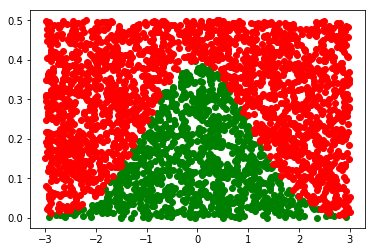

In [3]:
import random
import numpy as np
import matplotlib.pyplot as plt

xdomain = [-3, 3]     #Domain of X, our target distribution.
 
def pdf(x):     #Our arbitrary probibility density function (f(x))

    return truncnorm.pdf(x, xdomain[0], xdomain[1])

def random_point_within_domain():    #Random distribution of points within our xdomain (i.e. xdomain[0]=-3, xdomain[1]=3)   
    x = random.uniform(xdomain[0], xdomain[1])
    y = random.uniform(0, 0.5)
    return (x,y)
 
n = 1000     #Number of sample points
 
accepted = []    #Array 1 to capture accepted values
rejected = []    #Array 2 to capture rejected values

while len(accepted) < n:  #Run simulation until we reach a valid number of points (defiend by n).
    
    x, y = random_point_within_domain()    #Get random point
    
    if y < pdf(x):    #If y is below blue curve then accept it
       accepted.append((x, y))
    
    else:     #If y is below the curve then reject it.
       rejected.append((x, y))
    
plt.plot([x[0] for x in accepted], [x[1] for x in accepted] , 'ro', color='green') # plot accepted points
plt.plot([x[0] for x in rejected], [x[1] for x in rejected] , 'ro', color='red') # plot rejected points


### Result of Rejection Sampling

The data obtained from **rejection sampling** is all within the target.  Further, the new set of accepted data is in agreement with our previous hypothesis.

### Example 2


This time, we would like to know what the most likely value of parameter  𝑝1  for our previous experiment (A) was.

1.   Sample a parameter value from the set of possible values of $p_A$
  * this is called a prior and represents our prior belief or $p_A$
    * In our example, we believe that $p_1$ is any possible value in $[0, 1]$ conitnuum
   
2.   Generate an outcome, given that parameter value (in our example, run the test that is described by binomial distribution with parameter $p_1$ and number of people $8$)

3.  *   If the generated outcome is the observed data, record the value of the parameter $p_1$ as a possible value that can generate the observed results
    *   If the generated outcome is not the observed data, ignore (or reject) the parameter $p_1$
4.   Repeat the procedure n times.


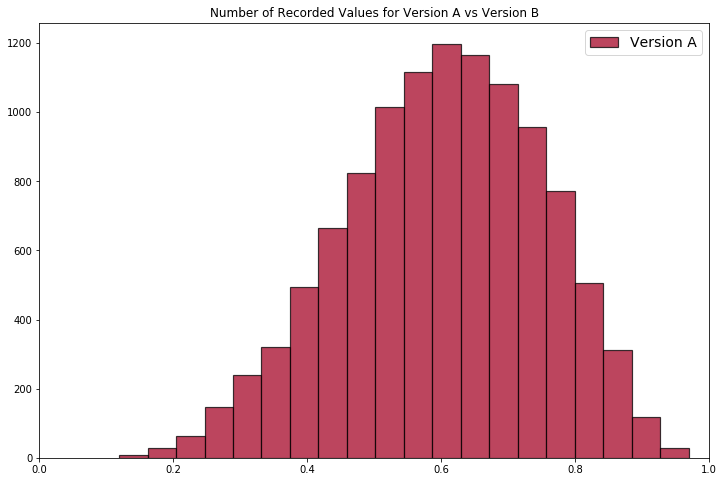

In [9]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

# Version A
n_A = 8        # number of people Version A was tested on
obs_A = 5      # observed number of sign ups for Version A
p_A_recorded = []      #array to capture recorded obs.

n = 100000 #number of smample points 

for _ in  range(n):
  p_A = np.random.uniform(0, 1)    # Sample parameter values p_A

  v_A = np.random.binomial(n_A, p_A)     # For p_A generate an outcome from the binomal distribution 
  
  if v_A == obs_A:     # Compare generated outcomes to the observed data
    p_A_recorded.append(p_A)

    
#Plot figure
    
fig = plt.figure(figsize = (12,8)) 

plt.xlim(0, 1)

plt.hist(p_A_recorded,  bins = 20, alpha = 0.75, label = "Version A", color = "#A60628", normed = False, edgecolor='black', linewidth=1.2)

plt.title("Number of Recorded Values for Version A vs Version B")

plt.legend(loc = 'upper right', fontsize=14)

plt.show()


### Exploring the distribution of the param $p$.

* What does the distribution of $p_A$ look like

  * This ditribution represents the values that most likely generate the observed that data
  
  * I.e., what  we believe, based on observing the data, the value of $p_A$ could have been
  
* Our prior belief was that  $p_A$ is any value between $0$ and $1$

  * Results show that  some values of $p_1$ occur with more probability that other values.
  * We could have encoded our belief in a way that gives us some values more often than others
 
* The resulting distribution is called the posterior distrubution of the param $p_A$



### Analyzing the Simulation Results

* Histograms shows the probability of $p_A$ to highest around 0.625
 * This agrees with the likelihood
 * Show that the value could also be, with non-negligible in other values
 
* In this case, this does not add much to the likelihood. 

* Imagine however that we have another dataset of signups with for version A 
  * Out of 9 users tested, 6 signed up for version A.

### Updating our Beliefs

* We have already done some work with $p_A$ which led to generate a posterior of $p_A$ (via **rejection sampling**)
* Rather than sample $p_A$ uniformly from [0,1], we can sample it from the posterior, which contains only "accepted" values that agree with our data.
  * In this new round the posterior becomes a prior
* We can sample from a histogram from the histogram data ("Number of Recorded Values for Version A vs Version B") which represents the posterior. 
* The new data can then be used to update the probability of our hypothesis. 

In [150]:
np.random.choice(p_A_recorded)

0.7032831013402725

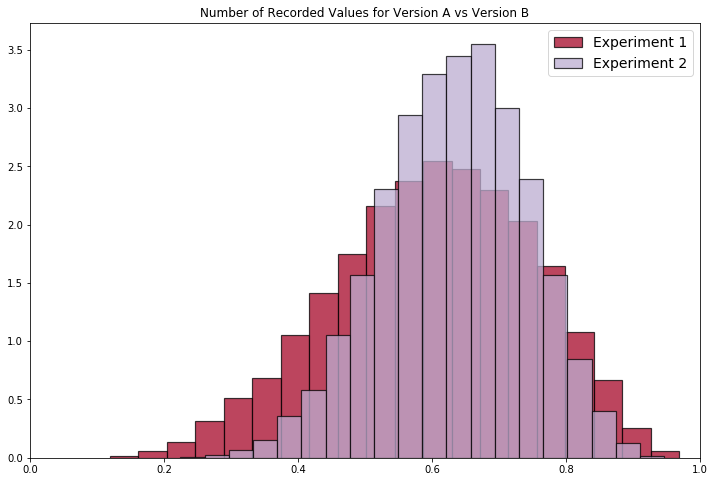

In [10]:
# import packages
import numpy as np
import matplotlib.pyplot as plt

# Version A
n_A = 9        # number of people Version A was tested on
obs_A = 6      # observed number of sign ups for Version A
p_A_recorded_experiment_2 = []

num_of_recorded_vals = 100000

for _ in  range(num_of_recorded_vals):
  # Sample parameter values p_A and p_B
  p_A = np.random.choice(p_A_recorded)

  # For each p_A and p_B generate an outcome from the binomal distribution 
  v_A = np.random.binomial(n_A, p_A)
  # Compare generated outcomes to the observed data
  if v_A == obs_A:
    p_A_recorded_experiment_2.append(p_A)

    
#Plot data


fig = plt.figure(figsize = (12,8)) 

plt.xlim(0, 1)

plt.hist(p_A_recorded,  bins = 20, normed=True, alpha = 0.75, label = "Experiment 1", color = "#A60628",  edgecolor='black', linewidth=1.2,)
plt.hist(p_A_recorded_experiment_2,  bins = 20, normed=True, alpha = 0.75, label = "Experiment 2", color = "#bcadd1", edgecolor='black', linewidth=1.2)

plt.title("Number of Recorded Values for Version A vs Version B")

plt.legend(loc = 'upper right', fontsize=14)

plt.show()


### **Bayesian Inference**
---

* Bayesian inference  Allows us to use probability theory to assign probabilities to *parameters*

  * Allows  encodes  beliefs in a way that is probabilistic
  
  * Allows for incorporating new data in a way that leverages prior discoveries




https://theclevermachine.wordpress.com/2012/09/10/rejection-sampling/
https://ragrawal.wordpress.com/2014/12/29/rejection-sampling-intuitive-understanding/
https://en.wikipedia.org/wiki/Rejection_sampling
https://en.wikipedia.org/wiki/Bayesian_inference